# Load Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opening zip file in jupyter notebook

In [2]:
#import zipfile
#zip_file="Data/Chicago_Crime_2001-2022.zip"
#extract_path='Data/'
#with zipfile.ZipFile(zip_file,'r') as zip_ref:
    #zip_ref.extractall(extract_path)


### Creating a folder Data in Data for cvs

In [3]:
import glob
folder = "Data/Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

### Checking dataframe

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


## Make a new date time column

In [5]:
df['datetime']=pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p')
df=df.sort_values('datetime')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 1541 to 238757
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 720.9+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,datetime
1541,3214584,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,2001-01-01
1445,1927872,01/01/2001 12:00:00 AM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,2001-01-01
1446,4768442,01/01/2001 12:00:00 AM,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,2001-01-01
1447,2280620,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782,2001-01-01
1448,9755214,01/01/2001 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN,2001-01-01


In [6]:
df.sample(10)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,datetime
411729,5948687,12/07/2007 03:00:00 PM,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,2123,2.0,4.0,41.812505,-87.604435,2007-12-07 15:00:00
20624,7330025,01/22/2010 08:00:00 PM,THEFT,$500 AND UNDER,STREET,False,False,1322,12.0,1.0,41.901035,-87.667778,2010-01-22 20:00:00
193409,4792033,06/10/2006 05:45:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1413,14.0,26.0,41.920060,-87.714186,2006-06-10 05:45:00
159551,2731851,05/09/2003 12:30:00 AM,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,STREET,True,False,1032,10.0,22.0,41.842202,-87.707410,2003-05-09 00:30:00
478133,1911651,12/23/2001 12:21:06 AM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,CHA PARKING LOT/GROUNDS,True,False,1135,11.0,NaN,41.873877,-87.699064,2001-12-23 00:21:06
262138,1640695,07/19/2001 02:30:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,False,2131,2.0,NaN,41.795435,-87.602564,2001-07-19 14:30:00
93498,10690864,05/15/2016 06:30:00 AM,THEFT,OVER $500,APARTMENT,False,False,2031,20.0,47.0,41.969270,-87.684060,2016-05-15 06:30:00
113057,7485046,04/26/2010 02:45:00 PM,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",False,False,224,2.0,3.0,41.805681,-87.620317,2010-04-26 14:45:00
316974,2943482,08/31/2003 09:30:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,421,4.0,7.0,41.754402,-87.563859,2003-08-31 21:30:00
139598,12794812,08/13/2022 08:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1924,19.0,44.0,41.946702,-87.656117,2022-08-13 20:00:00


## Setting index to new date time column

In [7]:
df=df.set_index('datetime').copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 00:00:00 to 2022-12-31 23:55:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2001-01-01,3214584,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,01/01/2001 12:00:00 AM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,01/01/2001 12:00:00 AM,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01,2280620,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01,9755214,01/01/2001 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN


# Resampling 

In [8]:
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='datetime', length=7713109, freq=None)

In [9]:
dfd=df.resample('D').sum()
dfd.info()
dfd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Freq: D
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         8035 non-null   int64  
 1   Arrest     8035 non-null   int64  
 2   Domestic   8035 non-null   int64  
 3   Beat       8035 non-null   int64  
 4   District   8035 non-null   float64
 5   Ward       8035 non-null   float64
 6   Latitude   8035 non-null   float64
 7   Longitude  8035 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 565.0 KB


/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1489/3329849576.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfd=df.resample('D').sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960


In [10]:
dfd.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='datetime', length=8035, freq='D')

# Topic 1) Comparing Police Districts
    - Which district had the most crimes in 2022?
    - Which had the least?

In [11]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

## Slicing out 2022

In [12]:
df22=df.loc['2022']
df22.info()
df22.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238858 entries, 2022-01-01 00:00:00 to 2022-12-31 23:55:00
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    238858 non-null  int64  
 1   Date                  238858 non-null  object 
 2   Primary Type          238858 non-null  object 
 3   Description           238858 non-null  object 
 4   Location Description  238011 non-null  object 
 5   Arrest                238858 non-null  bool   
 6   Domestic              238858 non-null  bool   
 7   Beat                  238858 non-null  int64  
 8   District              238858 non-null  float64
 9   Ward                  238848 non-null  float64
 10  Latitude              233085 non-null  float64
 11  Longitude             233085 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 20.5+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2022-01-01,12701677,01/01/2022 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2413,24.0,40.0,41.994004,-87.697387
2022-01-01,12615410,01/01/2022 12:00:00 AM,DECEPTIVE PRACTICE,"THEFT BY LESSEE, MOTOR VEHICLE",STREET,False,False,1235,12.0,25.0,41.852750,-87.640816
2022-01-01,12658052,01/01/2022 12:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,511,5.0,8.0,41.717813,-87.598279
2022-01-01,12957426,01/01/2022 12:00:00 AM,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,632,6.0,8.0,NaN,NaN
2022-01-01,13002739,01/01/2022 12:00:00 AM,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,734,7.0,17.0,NaN,NaN


## Making new dataframe with wanted columns

In [13]:
df1=df22[['District','Primary Type']]
df1.head()

,District,Primary Type
datetime,,
2022-01-01,24.0,OTHER OFFENSE
2022-01-01,12.0,DECEPTIVE PRACTICE
2022-01-01,5.0,DECEPTIVE PRACTICE
2022-01-01,6.0,OFFENSE INVOLVING CHILDREN
2022-01-01,7.0,OFFENSE INVOLVING CHILDREN


## Resampling with year end with group by

In [14]:
dfy=df1.groupby('District').count().copy()
dfy

,Primary Type
District,
1.0,13044
2.0,11793
3.0,11937
4.0,13931
5.0,9773
6.0,14694
7.0,10319
8.0,14805
9.0,10376


In [15]:
sortdf=dfy.sort_values(by='Primary Type',ascending=False)
sortdf

,Primary Type
District,
8.0,14805
6.0,14694
12.0,14341
4.0,13931
11.0,13457
1.0,13044
18.0,12429
19.0,12243
25.0,11951


    - District 8 had the most crime with a count of 14805 in 2022

    - District 31 has the least with a count of 15

# Topic 2) Crimes Across the Years:

    - Is the total number of crimes increasing or decreasing across the years?

    - Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

In [16]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

In [17]:
dfyears=df[['Primary Type']]
dfyears1=dfyears.resample("A").count().copy()
dfyears1

,Primary Type
datetime,
2001-12-31,485886
2002-12-31,486807
2003-12-31,475985
2004-12-31,469422
2005-12-31,453773
2006-12-31,448179
2007-12-31,437087
2008-12-31,427183
2009-12-31,392827


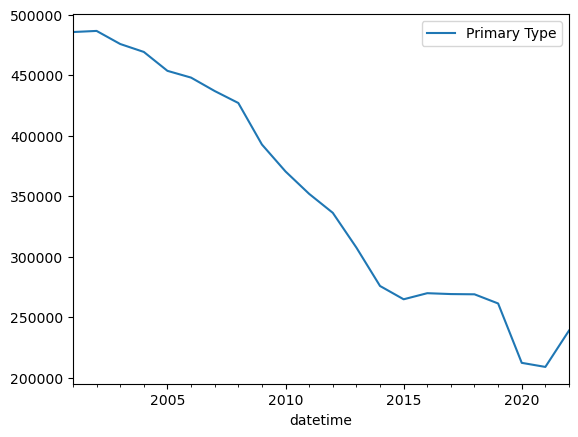

In [18]:
dfyears1.plot();

In [19]:
dfyear=df[['Primary Type']]
dfyear.head()

,Primary Type
datetime,
2001-01-01,THEFT
2001-01-01,THEFT
2001-01-01,OFFENSE INVOLVING CHILDREN
2001-01-01,THEFT
2001-01-01,SEX OFFENSE


In [20]:
dfyear.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='datetime', length=7713109, freq=None)

In [21]:
## resample as daily freq by state
y = dfyear.groupby("Primary Type").resample("A").count()
y.head()



Primary Type
Primary Type datetime                
ARSON        2001-12-31          1011
             2002-12-31          1032
             2003-12-31           955
             2004-12-31           778
             2005-12-31           691

In [22]:
y

Primary Type
Primary Type      datetime                
ARSON             2001-12-31          1011
                  2002-12-31          1032
                  2003-12-31           955
                  2004-12-31           778
                  2005-12-31           691
...                                    ...
WEAPONS VIOLATION 2018-12-31          5456
                  2019-12-31          6339
                  2020-12-31          8432
                  2021-12-31          8980
                  2022-12-31          8766

[723 rows x 1 columns]

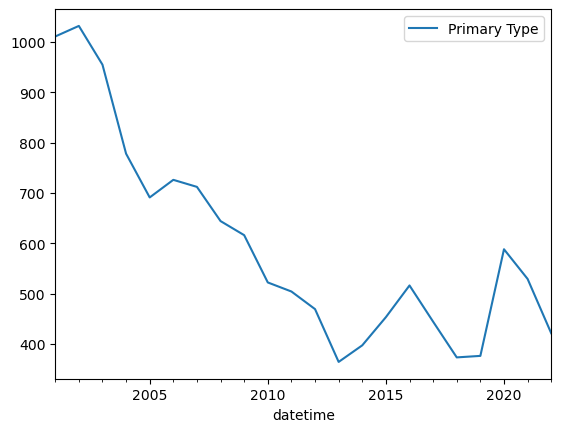

In [23]:
arson=y.loc['ARSON'].copy()
ax=arson.plot()

In [24]:
Unstack=y.unstack(level=0)

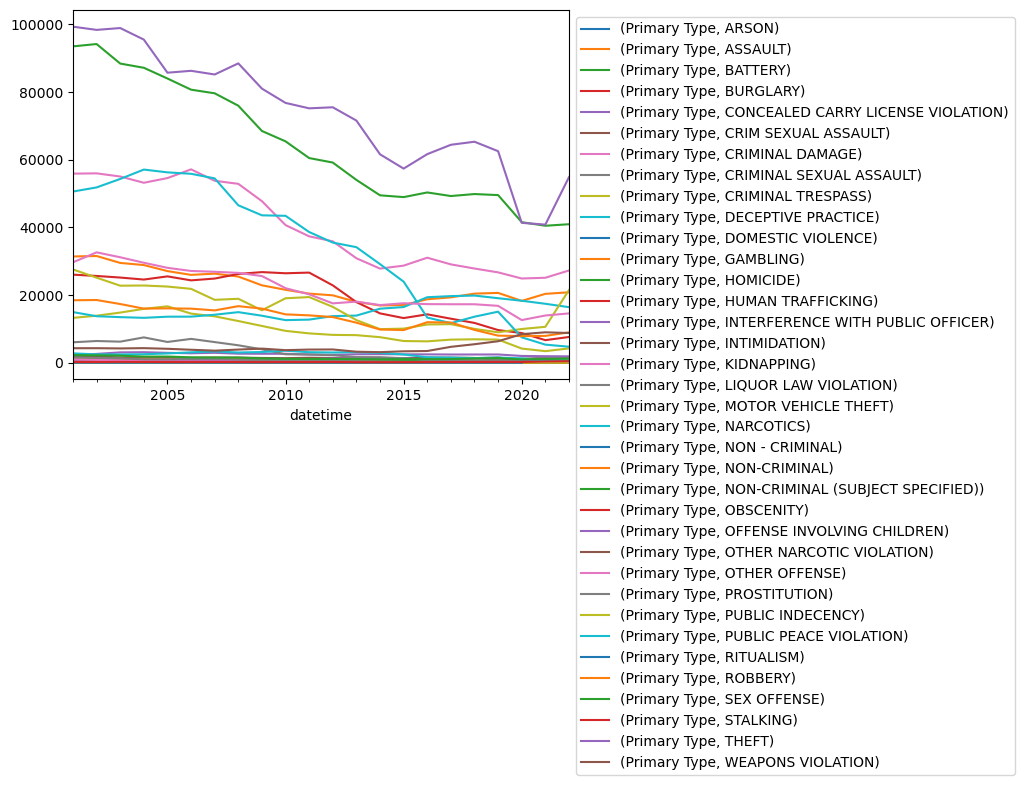

In [25]:
Unstack.plot()
plt.legend(bbox_to_anchor=(1,1));

    - Most crimes seem to be decreasing

# Topic 3) Comparing AM vs. PM Rush Hour:
    - Are crimes more common during AM rush hour or PM rush hour?

    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour

    - You can consider any crime that occurred between 4 - 7 PM as PM rush hour.

    - Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
    - Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [26]:
dfyears1.head()

,Primary Type
datetime,
2001-12-31,485886
2002-12-31,486807
2003-12-31,475985
2004-12-31,469422
2005-12-31,453773


In [27]:
df['hours']=df.index.hour
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,hours
datetime,,,,,,,,,,,,,
2001-01-01,3214584,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,0
2001-01-01,1927872,01/01/2001 12:00:00 AM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,0
2001-01-01,4768442,01/01/2001 12:00:00 AM,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,0
2001-01-01,2280620,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782,0
2001-01-01,9755214,01/01/2001 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN,0


<Axes: xlabel='hours', ylabel='count'>

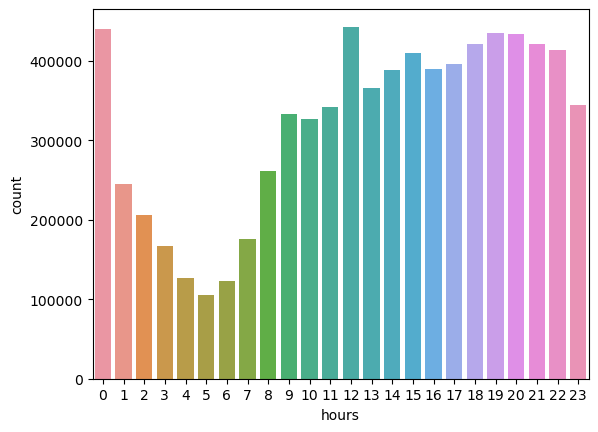

In [28]:
sns.countplot(data=df,x='hours');

In [29]:
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='datetime', length=7713109, freq=None)

In [30]:
df.loc['7am':'10am']
df.head()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 07:00:00

## Making a filter for am hours needed and saving it to a column in the dataframe

In [35]:
df['amrush']=(df['hours']<=10) & (df['hours']>=7)

## Making a varible with the filtered column

In [38]:
dfam=df[df['amrush']==True]

## Calling value_counts() and head() on Primary Type of new dataframe for top 5 crimes

In [53]:
am=dfam['Primary Type'].value_counts()
am

THEFT                                260759
BATTERY                              158475
CRIMINAL DAMAGE                      109089
BURGLARY                              96219
OTHER OFFENSE                         89870
DECEPTIVE PRACTICE                    80006
ASSAULT                               73636
NARCOTICS                             67032
MOTOR VEHICLE THEFT                   54035
CRIMINAL TRESPASS                     30493
ROBBERY                               26337
PROSTITUTION                          12215
OFFENSE INVOLVING CHILDREN             8835
WEAPONS VIOLATION                      8435
PUBLIC PEACE VIOLATION                 5460
SEX OFFENSE                            5005
CRIM SEXUAL ASSAULT                    2567
KIDNAPPING                             1649
INTERFERENCE WITH PUBLIC OFFICER       1380
ARSON                                  1139
HOMICIDE                               1133
STALKING                                928
INTIMIDATION                    

## Filtering out pm hours wanted and saving it as a new column in dataframe

In [44]:
df['pmrush']=(df['hours']>=16) & (df['hours']<=19)

## Filtering out new dataframe with wanted data

In [45]:
dfpm=df[df['pmrush']==True]

## Calling value counts() and head() on Primary Type for top 5 crimes in pm

In [52]:
pm=dfpm['Primary Type'].value_counts()
pm

THEFT                                379122
BATTERY                              288003
CRIMINAL DAMAGE                      183423
NARCOTICS                            164754
ASSAULT                              118179
OTHER OFFENSE                         98687
BURGLARY                              78604
MOTOR VEHICLE THEFT                   74678
ROBBERY                               61775
DECEPTIVE PRACTICE                    58973
CRIMINAL TRESPASS                     48564
WEAPONS VIOLATION                     20485
OFFENSE INVOLVING CHILDREN            13278
PUBLIC PEACE VIOLATION                12135
PROSTITUTION                           8125
SEX OFFENSE                            5865
GAMBLING                               4905
INTERFERENCE WITH PUBLIC OFFICER       4403
LIQUOR LAW VIOLATION                   4168
CRIM SEXUAL ASSAULT                    3874
HOMICIDE                               2227
KIDNAPPING                             2092
ARSON                           

    - Crime are more common during pm hours

    - Motor vehicle is more commom during pm 

In [56]:
am.head()

THEFT              260759
BATTERY            158475
CRIMINAL DAMAGE    109089
BURGLARY            96219
OTHER OFFENSE       89870
Name: Primary Type, dtype: int64

In [57]:
pm.head()

THEFT              379122
BATTERY            288003
CRIMINAL DAMAGE    183423
NARCOTICS          164754
ASSAULT            118179
Name: Primary Type, dtype: int64